In [1]:
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
import re
import numpy as np
import socket
import scipy as sc
import datetime
import matplotlib
import matplotlib.pyplot as plt
import statistics
import datetime

In [2]:
unigram = pd.read_csv('UnigramFrequencies')

words=[]
frequencies = []
MCW = []

def most_frequent(List):
    return max(set(List), key = List.count)

for x in range(5):
    for row in range(len(unigram)):
        for column in [8,10,12,14,16,18,20,22,24,26]:
            word = unigram.iloc[row,column]
            if word not in MCW:
                words.append(word)
            
    MCW.append(most_frequent(words))
    words=[]
    
print(MCW)

['police', 'shooting', 'said', 'shot', 'people']


In [5]:
dates = []
police_freq = []
shooting_freq = []
said_freq = []
shot_freq = []
people_freq = []
freq = [police_freq,shooting_freq,said_freq,shot_freq,people_freq]

for row in range(len(unigram)):
        for column in [8,10,12,14,16,18,20,22,24,26]:
            x = datetime.datetime.strptime(unigram.iloc[row,2],"%Y-%m-%d")
            word = unigram.iloc[row,column]
            if x not in dates:
                dates.append(x)
                for i in range(5):
                    if word==MCW[i]:
                        freq[i].append(unigram.iloc[row,(column+1)])
                    else:
                        freq[i].append(0)
            else:
                for i in range(5):
                    if word==MCW[i]:
                        freq[i][len(freq[i])-1]+=unigram.iloc[row,(column+1)]
                

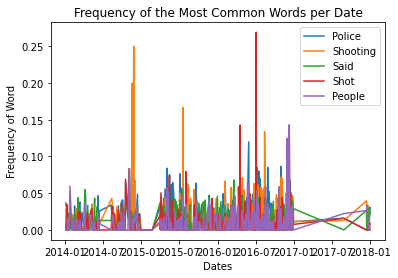

In [6]:
plt.plot(dates, police_freq, label = "Police")
plt.plot(dates, shooting_freq, label = "Shooting")
plt.plot(dates, said_freq, label = "Said")
plt.plot(dates, shot_freq, label = "Shot")
plt.plot(dates, people_freq, label = "People")

# naming the x axis
plt.xlabel('Dates')
# naming the y axis
plt.ylabel('Frequency of Word')
# giving a title to my graph
plt.title('Frequency of the Most Common Words per Date')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()